In [14]:
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.signal import argrelextrema
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.morphology import square, dilation
import matplotlib.pyplot as plt

In [15]:
# Generate sample data
np.random.seed(0)
X = np.vstack([np.random.normal(0, 1, (300, 2)),
               np.random.normal(5, 1, (300, 2))])


In [26]:
# 1. Compute the KDE for the data points
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)
log_densities = kde.score_samples(X)
densities = np.exp(log_densities)

# 2. Determine a density threshold
threshold = threshold_otsu(densities)
print(threshold)
# 3. Create a binary mask
binary_mask = (densities > threshold).astype(int)

# 4. Apply connected components labeling
# First, we'll create a 2D grid around the data points to apply the labeling
tiny_value=
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
grid_samples = np.c_[xx.ravel(), yy.ravel()]
print(grid_samples[0])

grid_densities = np.exp(kde.score_samples(grid_samples))
grid_binary_mask = (grid_densities > threshold).astype(int)

# Dilate the mask to ensure connectivity
grid_binary_mask = dilation(grid_binary_mask.reshape(xx.shape), square(3))

# Label connected components
labeled_grid = label(grid_binary_mask)

# 5. Assign data points to clusters
# For each data point, find its corresponding label in the labeled grid
labels = np.zeros(X.shape[0], dtype=int)
for i, (x, y) in enumerate(X):
    x_idx = int((x - x_min) / (x_max - x_min) * 99)
    y_idx = int((y - y_min) / (y_max - y_min) * 99)
    labels[i] = labeled_grid[x_idx, y_idx]

0.03699841026869713
[-3.65917224 -4.04614305]


<function label at 0x7f7265b2bd08>


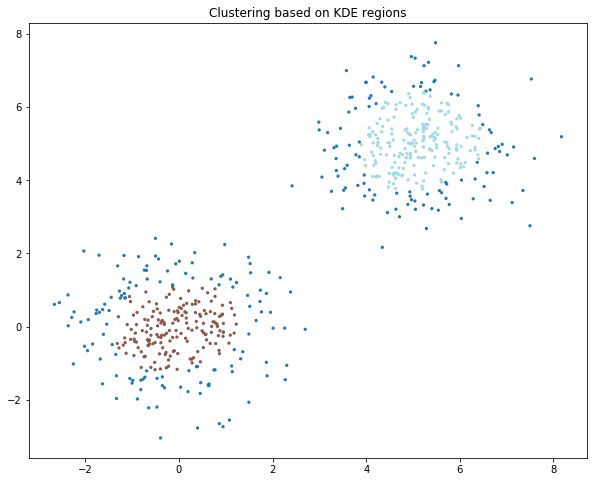

In [18]:
# Visualization
plt.figure(figsize=(10, 8))

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20', s=5)
plt.title("Clustering based on KDE regions")
plt.show()

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0
 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0
 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1
 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1
 1 1 1 1 0 2 0 0 2 0 2 2 2 0 2 2 2 0 2 2 2 2 2 0 2 0 0 2 0 0 2 2 0 2 0 2 2
 2 0 0 0 2 0 2 2 2 0 0 0 2 0 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 0 0 2
 0 0 2 2 0 0 0 2 2 0 2 2 0 2 0 2 2 0 2 0 0 0 2 2 0 2 0 2 2 2 0 2 2 2 0 2 2
 0 0 2 2 2 2 0 0 2 2 2 2 2 2 0 2 2 2 0 0 2 0 2 2 2 2 2 0 2 2 0 2 0 0 2 2 2
 2 2 2 0 0 0 0 2 0 2 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 2 2 0 2 0 2 2 2 2 2 0 2
 2 2 0 2 2 2 0 2 2 2 2 2 